## Importing the Necessary Packages

In [541]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
import seaborn as sns
sns.set()

## Loading Data

In [542]:
raw_data = pd.read_csv('1.04 STATION SANDWIP.csv')
raw_data.head()

YEAR  MONTH  DAY  SURFACE PRESSURE  DEW POINT  TEMPERATURE  PRECIPITATION  \
0  2017      1    1            101.54      16.69        23.98           0.00   
1  2017      1    2            101.53      16.66        24.37           0.01   
2  2017      1    3            101.42      16.32        24.60           0.01   
3  2017      1    4            101.34      17.26        24.09           0.01   
4  2017      1    5            101.31      16.33        24.08           0.01   

   MAX WIND SPD  RELATIVE HUMIDITY  MIN TEMP  N_ICE EXTENT  S_ICE EXTENT  \
0          1.88              76.25     17.96        12.643         5.516   
1          1.62              76.88     17.60        12.644         5.387   
2          2.38              75.31     17.16        12.713         5.232   
3          3.11              80.94     17.37        12.954         5.149   
4          3.69              78.94     16.62        12.956         5.065   

    HIGH    LOW  
0  0.906 -2.184  
1  0.846 -2.124  
2  0.766 -2.064  
3  0.716 -1.984  
4  0.666 -1.884

## Handling Null Values

In [543]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 1
LOW                  0
dtype: int64

In [544]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

YEAR        MONTH          DAY  SURFACE PRESSURE    DEW POINT  \
count  1460.000000  1460.000000  1460.000000       1460.000000  1460.000000   
mean   2018.501370     6.522603    15.738356        100.860027    22.241712   
std       1.119029     3.451044     8.799809          0.536813     4.690582   
min    2017.000000     1.000000     1.000000         99.210000     9.330000   
25%    2017.750000     4.000000     8.000000        100.427500    18.345000   
50%    2019.000000     7.000000    16.000000        100.910000    24.180000   
75%    2020.000000    10.000000    23.000000        101.310000    26.230000   
max    2020.000000    12.000000    31.000000        101.920000    27.940000   

       TEMPERATURE  PRECIPITATION  MAX WIND SPD  RELATIVE HUMIDITY  \
count  1460.000000    1460.000000   1460.000000        1460.000000   
mean     27.980596      15.630034      3.201616          80.033596   
std       2.866740      31.301240      2.319251           8.116805   
min      19.450000       0.000000      0.040000          48.940000   
25%      26.205000       0.000000      1.340000          74.310000   
50%      29.145000       2.935000      2.770000          82.380000   
75%      29.930000      18.090000      4.612500          86.560000   
max      33.500000     389.670000     11.000000          93.000000   

          MIN TEMP  N_ICE EXTENT  S_ICE EXTENT         HIGH          LOW  
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  
mean     24.223068     10.275003     11.054688     1.878397    -1.925562  
std       4.565971      3.527786      5.801186     0.941878     1.339417  
min      11.830000      3.793000      2.080000    -3.514000    -3.514000  
25%      20.852500      6.828750      5.163250     1.226000    -2.884000  
50%      26.440000     11.158000     11.883000     1.748000    -2.644000  
75%      27.900000     13.462750     16.883000     2.386000    -1.684000  
max      29.410000     15.071000     19.062000     4.800000     1.180000

## Distribution Check and Dealing With Outliers

In [545]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


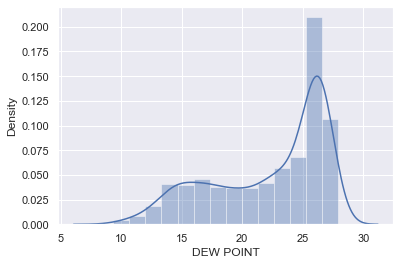

In [546]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


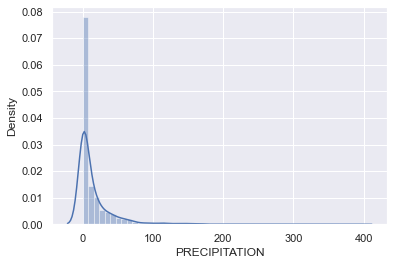

In [547]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


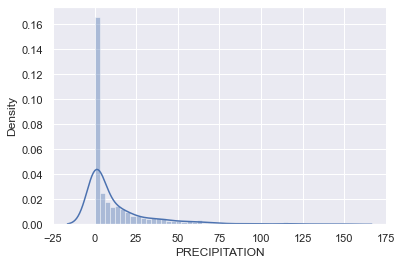

In [548]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [549]:
data_cleaned = data_1.reset_index(drop=True)

In [550]:
data_cleaned = data_cleaned.drop(['LOW'],axis=1)

In [551]:
data_cleaned.corr()['HIGH']

YEAR                 0.413180
MONTH                0.093774
DAY                  0.027352
SURFACE PRESSURE    -0.428718
DEW POINT            0.448374
TEMPERATURE          0.407102
PRECIPITATION        0.229719
MAX WIND SPD         0.207724
RELATIVE HUMIDITY    0.300948
MIN TEMP             0.454471
N_ICE EXTENT        -0.374179
S_ICE EXTENT         0.386880
HIGH                 1.000000
Name: HIGH, dtype: float64

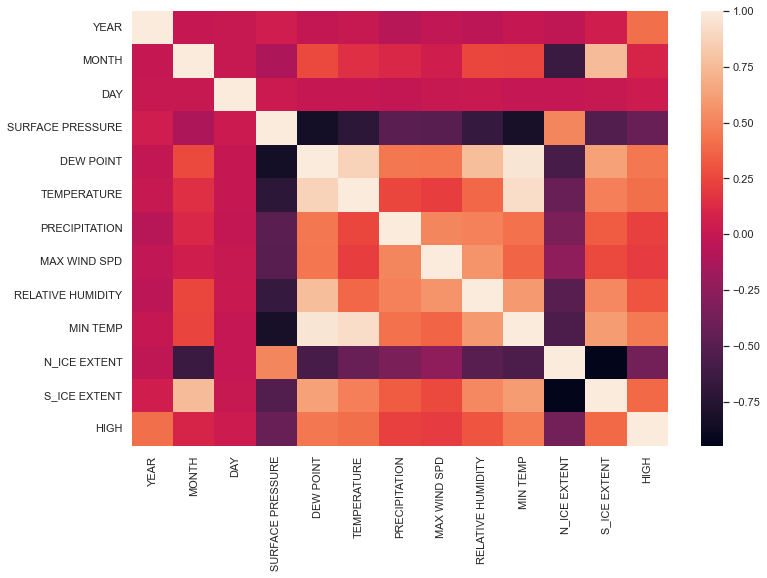

In [552]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data_cleaned.corr(), ax=ax)
plt.show()

In [553]:
data_cleaned = data_cleaned.drop(['DEW POINT'],axis=1)
data_cleaned = data_cleaned.drop(['MIN TEMP'],axis=1)
data_cleaned = data_cleaned.drop(['N_ICE EXTENT'],axis=1)
data_cleaned = data_cleaned.drop(['RELATIVE HUMIDITY'],axis=1)
data_cleaned.describe(include='all')

YEAR        MONTH          DAY  SURFACE PRESSURE  TEMPERATURE  \
count  1445.000000  1445.000000  1445.000000         1445.0000  1445.000000   
mean   2018.507958     6.514879    15.741869          100.8669    27.967336   
std       1.119321     3.466992     8.813264            0.5351     2.878224   
min    2017.000000     1.000000     1.000000           99.2100    19.450000   
25%    2018.000000     4.000000     8.000000          100.4400    26.170000   
50%    2019.000000     6.000000    16.000000          100.9100    29.130000   
75%    2020.000000    10.000000    23.000000          101.3200    29.930000   
max    2020.000000    12.000000    31.000000          101.9200    33.500000   

       PRECIPITATION  MAX WIND SPD  S_ICE EXTENT         HIGH  
count    1445.000000   1445.000000   1445.000000  1445.000000  
mean       13.601017      3.148360     11.008118     1.875301  
std        23.395246      2.267261      5.811978     0.943054  
min         0.000000      0.040000      2.080000    -3.514000  
25%         0.000000      1.320000      5.111000     1.226000  
50%         2.720000      2.750000     11.755000     1.726000  
75%        17.580000      4.530000     16.889000     2.386000  
max       150.200000     11.000000     19.062000     4.800000

## Neural Network Regression

### Train-Test Split

In [554]:
dataset = data_cleaned
train_dataset = dataset.sample(frac=0.8,random_state=22)
test_dataset = dataset.drop(train_dataset.index)

#### Separate the target value, or “label”, from the features. This label is the value that we will train the model to predict.

In [555]:
train_labels = train_dataset.pop('HIGH')
test_labels = test_dataset.pop('HIGH')

### Scaling the Input Data

In [556]:
scaler=MinMaxScaler()
scaler.fit(train_dataset)
normed_train_data = scaler.transform(train_dataset)
scaler.fit(test_dataset)
normed_test_data = scaler.transform(test_dataset)

### Model

In [557]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [558]:
NN_model = build_model()
NN_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                576       
                                                                 
 dense_55 (Dense)            (None, 64)                4160      
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


### Training

In [559]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 3500

history = NN_model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [560]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  mean_absolute_error  mean_squared_error  val_loss  \
3495  0.012591             0.084974            0.012591  0.303830   
3496  0.013602             0.088774            0.013602  0.315469   
3497  0.016004             0.098231            0.016004  0.286472   
3498  0.015524             0.096976            0.015524  0.290357   
3499  0.012753             0.086286            0.012753  0.292137   

      val_mean_absolute_error  val_mean_squared_error  epoch  
3495                 0.298278                0.303830   3495  
3496                 0.315488                0.315469   3496  
3497                 0.291906                0.286472   3497  
3498                 0.292533                0.290357   3498  
3499                 0.297228                0.292137   3499

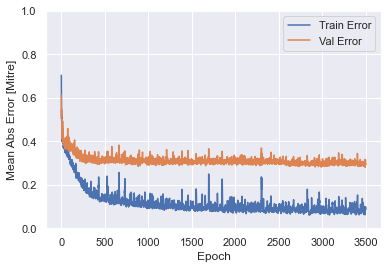

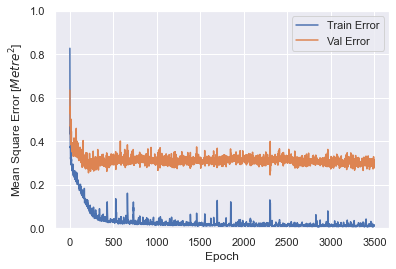

In [561]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Mitre]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Metre^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [562]:
#model = build_model()

#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#plot_history(history)

### Testing

In [563]:
loss, mae, mse = NN_model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} M".format(mae))

Testing set Mean Abs Error:  0.33 M


In [564]:
y_pred_NN = NN_model.predict(normed_test_data)
Test_score_NN =r2_score(test_labels,y_pred_NN)
print("Testing Score: ",Test_score_NN)

Testing Score:  0.6776875060582026


### Visulizing Predictions

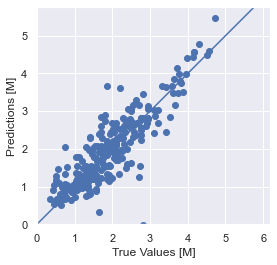

In [565]:
y_pred_NN = NN_model.predict(normed_test_data).flatten()

plt.scatter(test_labels, y_pred_NN)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

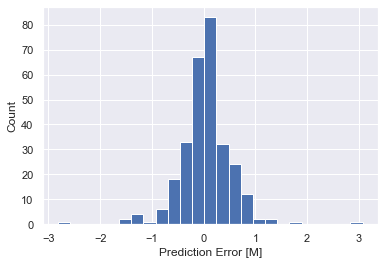

In [566]:
error = y_pred_NN - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [M]")
_ = plt.ylabel("Count")
plt.show()

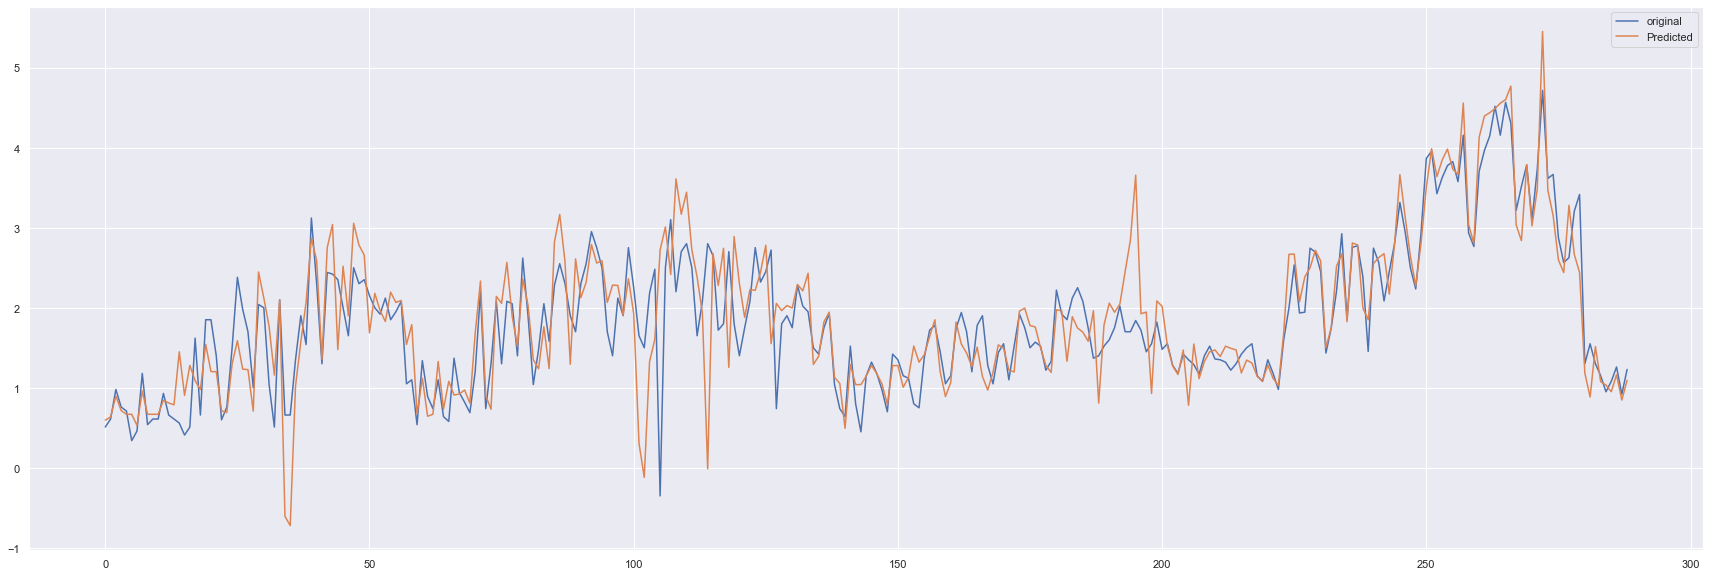

In [567]:
x_ax = range(len(test_labels))
plt.figure(figsize=(30,10))
plt.plot(x_ax, test_labels,label="original")
plt.plot(x_ax, y_pred_NN, label="Predicted")
plt.legend()
plt.show()

In [568]:
data_wmv = raw_data[raw_data.isnull().any(axis=1)]
data_wmv.head()

YEAR  MONTH  DAY  SURFACE PRESSURE  DEW POINT  TEMPERATURE  \
548  2018      7    3            100.14      26.72         28.9   

     PRECIPITATION  MAX WIND SPD  RELATIVE HUMIDITY  MIN TEMP  N_ICE EXTENT  \
548         168.75          7.98              90.88     27.86         9.633   

     S_ICE EXTENT  HIGH    LOW  
548        14.744   NaN -2.584

In [569]:
scaler=MinMaxScaler()
scaler.fit(data_wmv)
normed_inp_data = scaler.transform(data_wmv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [570]:
test_predictions = NN_model.predict(normed_inp_data).flatten()
test_predictions

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 14)
